We are using weight matrices to have more tuning options in the architecture.
We are doing so by using simple linear transformation:

(following was created by ChatGPT):

# Linear Layer in a Neural Network

A **linear layer** (or **fully connected layer**) in a neural network is a layer where each input neuron is connected to each output neuron with a certain weight. This layer performs a linear transformation on the input vector.

## Mathematical Formulation

Given an input vector \( \mathbf{x} \in \mathbb{R}^n \) and a weight matrix \( \mathbf{W} \in \mathbb{R}^{m \times n} \), and a bias vector \( \mathbf{b} \in \mathbb{R}^m \), the output \( \mathbf{y} \) of a linear layer can be computed as:

\[ \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \]

- **Input Vector** \( \mathbf{x} \): \(\begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} \)
- **Weight Matrix** \( \mathbf{W} \): \(\begin{bmatrix} w_{11} & w_{12} & \cdots & w_{1n} \\ w_{21} & w_{22} & \cdots & w_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{m1} & w_{m2} & \cdots & w_{mn} \end{bmatrix} \)
- **Bias Vector** \( \mathbf{b} \): \(\begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_m \end{bmatrix} \)
- **Output Vector** \( \mathbf{y} \): \(\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix} \)

\mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b}

![Alt text](/Users/soeren/code/gpt2/images/q_k_v.png)

In [6]:
import torch
import torch.nn as nn

# Define the linear layer
class MyLinearLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLinearLayer, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Example usage
input_size = 10
output_size = 5
x = torch.randn(1, input_size)  # Random input tensor

model = MyLinearLayer(input_size, output_size)
output = model(x)

print("Input:", x)
print("Output:", output)



Input: tensor([[ 0.8355, -0.7481, -1.2899, -0.7263,  1.0926, -0.5885, -2.3172,  0.9333,
          0.2250, -1.0686]])
Output: tensor([[ 0.0184,  0.4692, -0.6156, -0.2317, -0.4872]],
       grad_fn=<AddmmBackward0>)


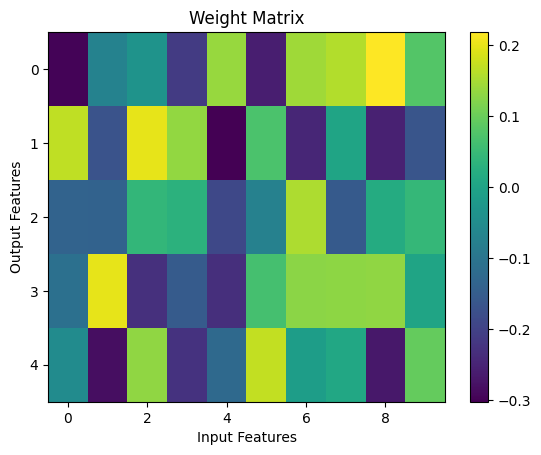

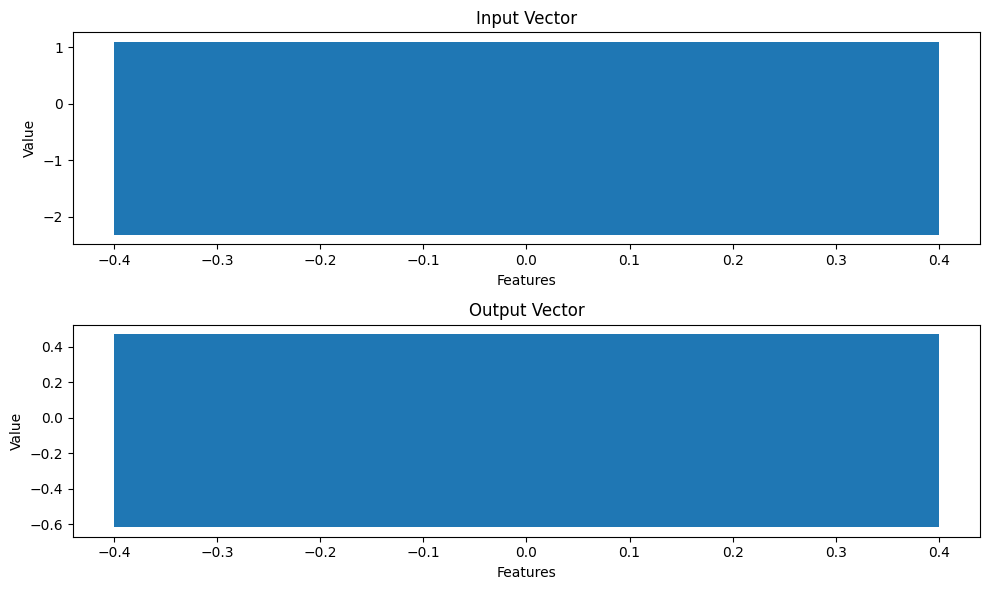

In [7]:
import matplotlib.pyplot as plt

# Visualize the weights
def visualize_weights(weights):
    plt.imshow(weights, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Weight Matrix')
    plt.xlabel('Input Features')
    plt.ylabel('Output Features')
    plt.show()

# Visualize the input and output
def visualize_vectors(input_vector, output_vector):
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    axs[0].bar(range(len(input_vector)), input_vector[0].numpy())
    axs[0].set_title('Input Vector')
    axs[0].set_xlabel('Features')
    axs[0].set_ylabel('Value')

    axs[1].bar(range(len(output_vector)), output_vector[0].detach().numpy())
    axs[1].set_title('Output Vector')
    axs[1].set_xlabel('Features')
    axs[1].set_ylabel('Value')

    plt.tight_layout()
    plt.show()

# Extract the weight matrix
weights = model.linear.weight.detach().numpy()

# Visualize the weight matrix
visualize_weights(weights)

# Visualize the input and output vectors
visualize_vectors(x, output)